In [1]:
#!pip install missingno

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [3]:
ls crime_data_raw/2010

apr10.xls*  dec10.xls*  jan10.xls*  jun10.xls*  may10.xls*  oct10.xls*
aug10.xls*  feb10.xls*  jul10.xls*  mar10.xls*  nov10.xls*  sep10.xls*


In [4]:
path = 'crime_data_raw/2010'

In [5]:
ls crime_data_raw/

10years/    2006/  2009/  2012/  2015/  premise_codes.csv*
1985_2014/  2007/  2010/  2013/  2016/  Untitled Folder/
2005/       2008/  2011/  2014/  2017/


In [6]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [7]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [8]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (2752234) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
# Of Offenses    136262 non-null float64
Beat             136262 non-null object
Block Range      136262 non-null object
Date             136262 non-null datetime64[ns]
Field11          0 non-null float64
Hour             136262 non-null float64
Offense Type     136262 non-null object
Premise          136262 non-null object
Street Name      136262 non-null object
Suffix           136262 non-null object
Type             136262 non-null object
Unnamed: 1       0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


In [10]:
df.Date.unique()

array(['2010-04-17T00:00:00.000000000', '2010-04-08T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-04-20T00:00:00.000000000',
       '2010-04-25T00:00:00.000000000', '2010-04-21T00:00:00.000000000',
       '2010-04-11T00:00:00.000000000', '2009-02-07T00:00:00.000000000',
       '2010-04-22T00:00:00.000000000', '2010-04-18T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '1995-11-29T00:00:00.000000000',
       '2010-04-07T00:00:00.000000000', '2010-04-05T00:00:00.000000000',
       '2010-03-16T00:00:00.000000000', '2010-02-28T00:00:00.000000000',
       '2006-08-15T00:00:00.000000000', '2010-04-26T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2010-04-27T00:00:00.000000000',
       '2008-04-07T00:00:00.000000000', '2010-04-06T00:00:00.000000000',
       '2010-04-12T00:00:00.000000000', '2010-04-13T00:00:00.000000000',
       '2010-04-23T00:00:00.000000000', '2010-04-29T00:00:00.000000000',
       '2010-04-24T00:00:00.000000000', '2010-04-09

In [11]:
df[df.Date.isnull()]

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
136262,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inspect Premise col

In [12]:
len(df.Premise.value_counts(dropna=False))

129

In [13]:
df.Premise.value_counts(dropna=False).head()

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
Name: Premise, dtype: int64

In [14]:
df.Premise.unique()

array(['05W', '20R', '13R', '20A', '18A', '100', '05E', '20D', '18T',
       '250', '040', '13A', '20P', '22M', '140', '070', '14V', '05V',
       '18R', '18C', '18G', '18O', '18M', '18S', '13B', '05D', '22E',
       '240', '18U', '13S', '13H', '210', '120', '080', '24A', '24J',
       '24E', '03B', '05Q', '05B', '05Z', '18N', '05L', '05C', '24F',
       '09D', '24P', '23S', '18P', '18H', '01K', '20G', '05P', '05F',
       '02B', '09P', '05R', '05O', '22P', '11R', '170', '20M', '20L',
       '05M', '18B', '09H', '20V', '22D', '18L', '05X', '13T', '20W',
       '03S', '18D', '20C', '150', '18W', '22H', '20N', '22C', '05Y',
       '20H', '25V', '05A', '190', '24G', '24V', '24C', '05G', '12V',
       '09R', '21V', '060', '19V', '05H', '05U', '11S', '05N', '11V',
       '24S', '11G', '160', '05T', '01T', '01A', '05S', '01B', '22U',
       '24B', '---', '24T', '11L', '02C', '11P', '24M', '02S', '11F',
       '09V', '22V', '01P', '25R', '11C', '04V', '23C', '01R', 'RES',
       '13C', '02V',

In [15]:
df.Premise = df.Premise.str.strip()

In [16]:
len(df.Premise.value_counts(dropna=False))

129

In [17]:
df.Premise.value_counts(dropna=False).head()

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
Name: Premise, dtype: int64

In [18]:
# check if  null values
df.isnull().values.any().any()

True

In [19]:
# check su, of null values
df.isnull().values.sum()

272536

In [20]:
len(df[df.isnull().any(axis=1)])

136263

## Visualize our data

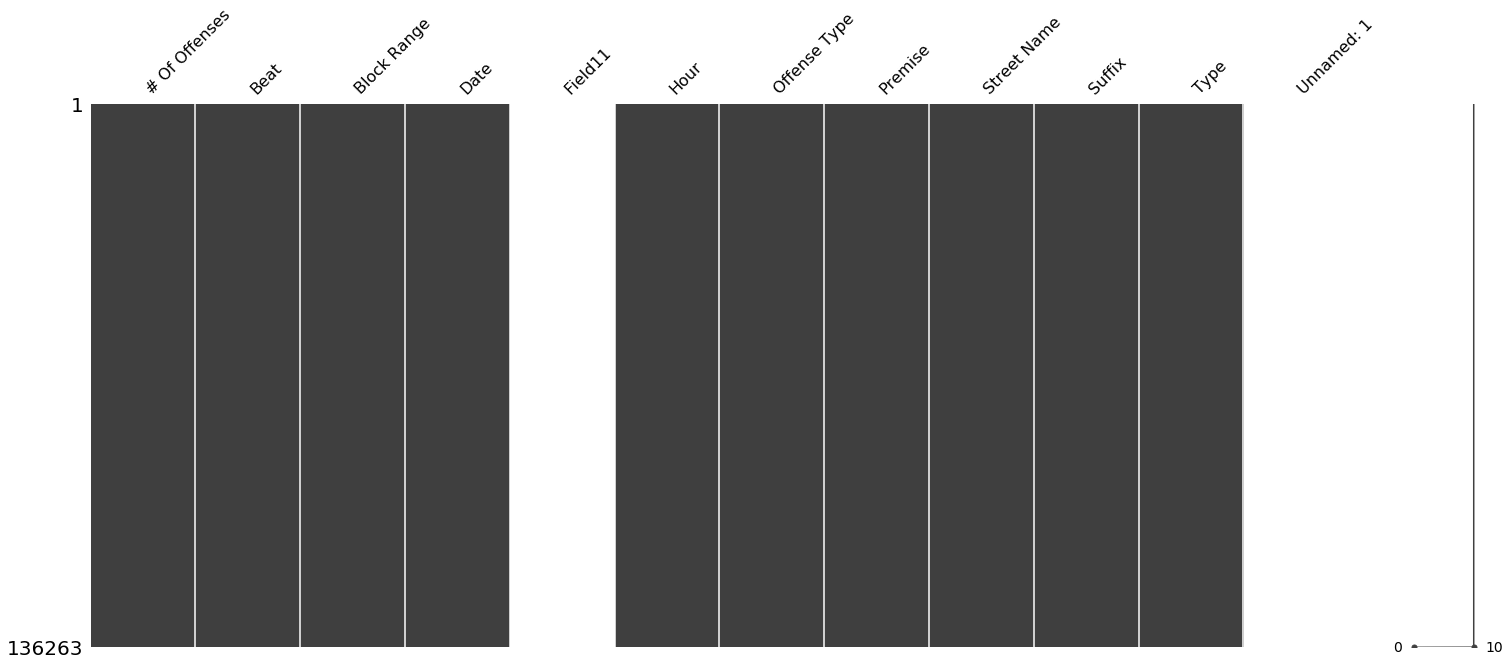

In [21]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [22]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22.0,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1.0,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23.0,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [23]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [24]:
df.head()

,# Of Offenses,Beat,Block Range,Date,Field11,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1.0,13D20,6600-6699,2010-04-17,NaN,0.0,Murder,05W,HEFFERNAN,-,-,NaN
1,1.0,11H40,10100-10199,2010-04-08,NaN,20.0,Murder,20R,LUCORE,-,-,NaN
2,2.0,19G20,11400-11499,2010-04-01,NaN,22.0,Murder,13R,CARVEL,-,LN,NaN
3,1.0,10H60,3700-3799,2010-04-17,NaN,1.0,Murder,13R,WHEELER,-,-,NaN
4,1.0,14D30,5100-5199,2010-04-08,NaN,23.0,Murder,20R,MYRTLEWOOD,-,DR,NaN


In [25]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [26]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 12 columns):
NumOffenses    136262 non-null float64
Beat           136262 non-null object
BlockRange     136262 non-null object
Date           136262 non-null datetime64[ns]
Field11        0 non-null float64
Hour           136262 non-null float64
OffenseType    136262 non-null object
Premise        136262 non-null object
StreetName     136262 non-null object
Suffix         136262 non-null object
Type           136262 non-null object
Unnamed: 1     0 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 12.5+ MB


## Subset dataframe to work on 

In [27]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136263 entries, 0 to 136262
Data columns (total 8 columns):
Date           136262 non-null datetime64[ns]
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 8.3+ MB


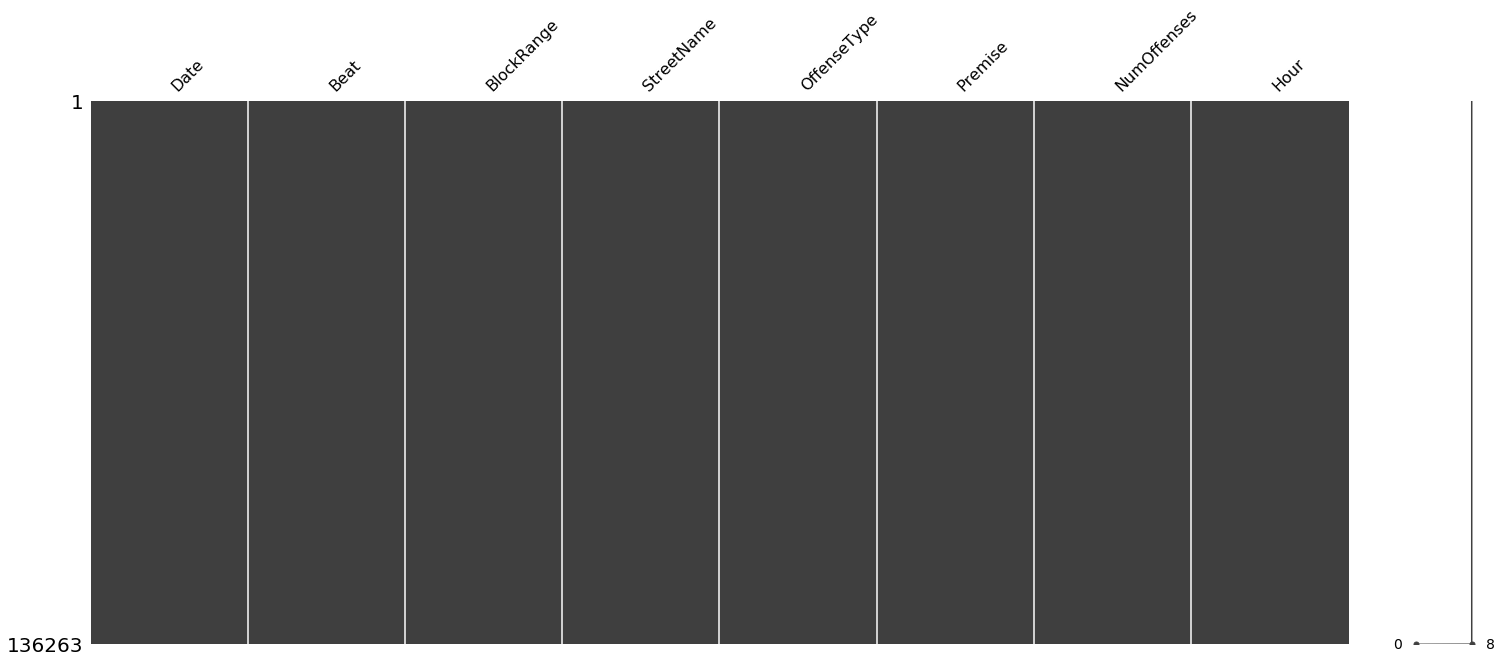

In [28]:

sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

# FIND NAN onevery col

In [29]:
len(crimes[crimes.Date.isnull()])

1

In [30]:
crimes[crimes.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
len(crimes[crimes.Beat.isnull()])

1

In [32]:
crimes[crimes.Beat.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
len(crimes[crimes.BlockRange.isnull()])

1

In [34]:
crimes[crimes.BlockRange.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
len(crimes[crimes.StreetName.isnull()])

1

In [36]:
crimes[crimes.StreetName.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
len(crimes[crimes.OffenseType.isnull()])

1

In [38]:
crimes[crimes.OffenseType.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
len(crimes[crimes.Premise.isnull()])

1

In [40]:
crimes[crimes.Premise.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
len(crimes[crimes.NumOffenses.isnull()])

1

In [42]:
crimes[crimes.NumOffenses.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
len(crimes[crimes.Hour.isnull()])

1

In [44]:
crimes[crimes.Hour.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Find NaN
- drop if > 2 nan

In [45]:
len(crimes[crimes.isnull().any(axis=1)])

1

In [46]:
crimes[crimes.isnull().any(axis=1)]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#crimes = crimes.dropna(thresh=2)

In [48]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [49]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136264 entries, 0 to 136263
Data columns (total 9 columns):
Date                   136262 non-null datetime64[ns]
Beat                   136262 non-null object
BlockRange             136262 non-null object
StreetName             136262 non-null object
OffenseType            136262 non-null object
Premise                136263 non-null object
NumOffenses            136262 non-null float64
Hour                   136262 non-null float64
Premise Description    136214 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 10.4+ MB


In [50]:
crimes.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
0,2010-04-17,13D20,6600-6699,HEFFERNAN,Murder,05W,1.0,0.0,WAREHOUSE
1,2010-04-01,14D20,3400-3499,CORDER,Burglary,05W,1.0,0.0,WAREHOUSE
2,2010-04-08,6B40,10200-10299,NORTH,Burglary,05W,1.0,23.0,WAREHOUSE
3,2010-04-23,13D10,6100-6199,SOUTH LP E,Burglary,05W,1.0,19.0,WAREHOUSE
4,2010-04-06,3B10,5900-5999,CENTRALCREST,Burglary,05W,1.0,17.0,WAREHOUSE


In [51]:
len(crimes[crimes['Premise Description'].isnull()])

50

In [52]:
crimes[crimes['Premise Description'].isnull()].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
135899,2010-04-29,18F50,3200-3299,GESSNER,Theft,---,1.0,21.0,NaN
135900,2010-07-29,19G10,8800-8899,BOONE,Rape,---,1.0,18.0,NaN
135901,2010-08-18,20G10,10000-10099,WESTPARK,Aggravated Assault,---,1.0,18.0,NaN
135902,2010-08-23,16E30,5100-5199,KELLING,Aggravated Assault,---,1.0,8.0,NaN
135903,2007-02-05,1A30,2400-2499,RICHMOND,Auto Theft,---,1.0,8.0,NaN


## Problem
- find nan values on one col, and copy related col

In [53]:
crimes.Premise.unique()

array(['05W', '20R', '13R', '20A', '18A', '100', '05E', '20D', '18T',
       '250', '040', '13A', '20P', '22M', '140', '070', '14V', '05V',
       '18R', '18C', '18G', '18O', '18M', '18S', '13B', '05D', '22E',
       '240', '18U', '13S', '13H', '210', '120', '080', '24A', '24J',
       '24E', '03B', '05Q', '05B', '05Z', '18N', '05L', '05C', '24F',
       '09D', '24P', '23S', '18P', '18H', '01K', '20G', '05P', '05F',
       '02B', '09P', '05R', '05O', '22P', '11R', '170', '20M', '20L',
       '05M', '18B', '09H', '20V', '22D', '18L', '05X', '13T', '20W',
       '03S', '18D', '20C', '150', '18W', '22H', '20N', '22C', '05Y',
       '20H', '25V', '05A', '190', '24G', '24V', '24C', '05G', '12V',
       '09R', '21V', '060', '19V', '05H', '05U', '11S', '05N', '11V',
       '24S', '11G', '160', '05T', '01T', '01A', '05S', '01B', '22U',
       '24B', '---', '24T', '11L', '02C', '11P', '24M', '02S', '11F',
       '09V', '22V', '01P', '25R', '11C', '04V', '23C', '01R', 'RES',
       '13C', '02V',

In [54]:
len(crimes[crimes['Premise'] == '---'])

45

In [55]:
len(crimes[crimes['Premise'] == 'N'])

0

In [56]:
crimes[crimes['Premise'] == 'N']

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


In [57]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [58]:
len(crimes[crimes['Premise Description'].isnull()])

1

In [59]:

crimes[crimes['Premise Description'].isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize data

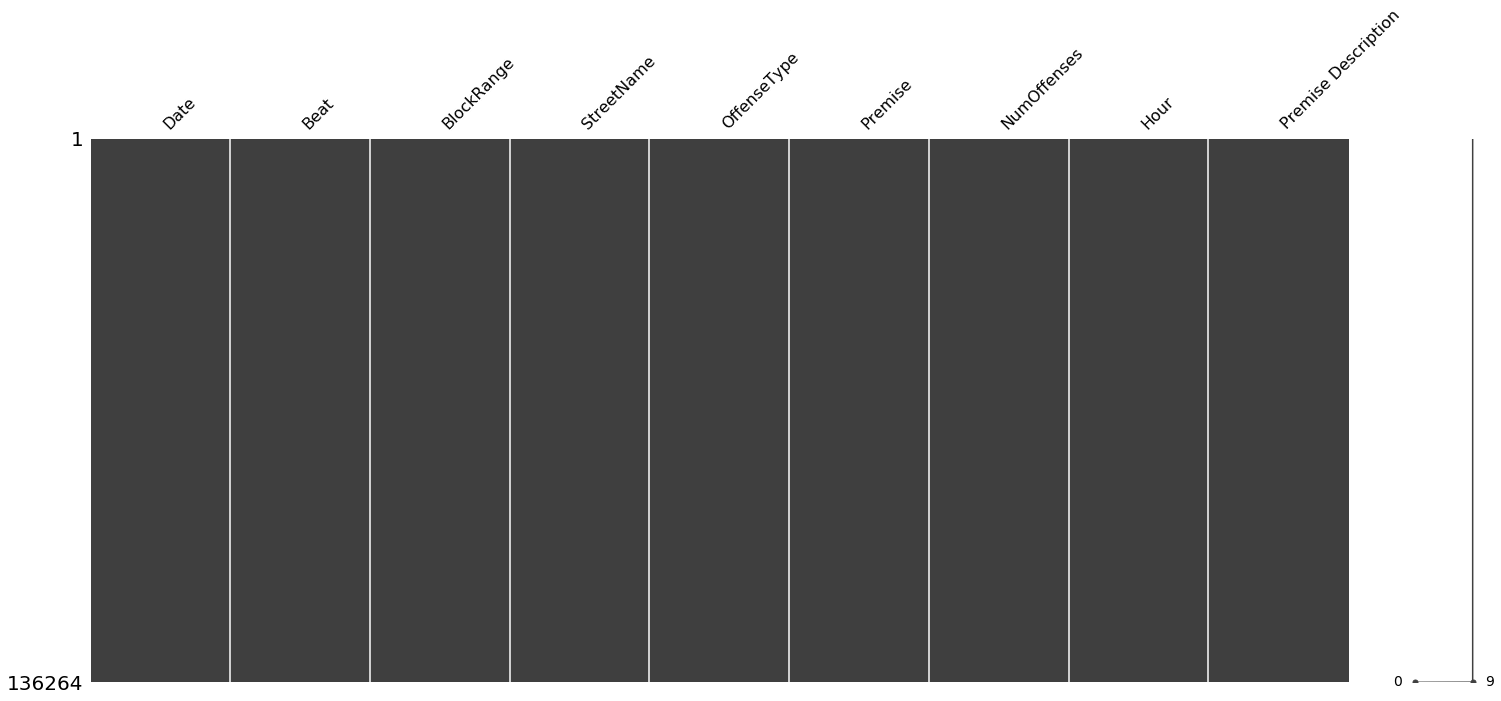

In [60]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [61]:
len(crimes[crimes.isnull().any(axis=1)])

2

In [62]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
136262,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136263,NaT,NaN,NaN,NaN,NaN,15V,NaN,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [63]:
crimes = crimes.dropna(thresh=3)

In [64]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [65]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description


## Inspect each column

In [66]:
crimes.dtypes

Date                   datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Hour                          float64
Premise Description            object
dtype: object

## Beat

In [67]:
len(crimes.Beat.value_counts())

122

In [68]:
len(crimes.Beat.value_counts(dropna=False))

122

In [69]:
crimes.Beat.unique()

array(['13D20', '14D20', '6B40', '13D10', '3B10', '10H10', '3B30',
       '15E40', '3B50', '9C20', '10H70', '5F30', '9C10', '3B40', '4F30',
       '14D10', '5F20', '13D30', '7C10', '6B30', '10H30', '14D50', '6B20',
       '18F50', '2A60', '11H10', '19G50', '9C30', '7C20', '16E10',
       '11H50', '10H20', '2A40', '20G10', '6B60', '11H20', '14D30',
       '18F30', '20G30', '8C40', '13D40', '2A30', '18F10', '15E30',
       '16E30', '2A20', '7C50', '7C30', '17E20', '2A10', '17E30', '16E20',
       '15E20', '1A50', '5F10', '14D40', '4F20', '2A50', '19G40', '5F40',
       '18F60', '20G40', '17E10', '10H50', '20G50', '8C20', '20G70',
       '20G60', '7C40', '8C10', '6B10', '4F10', '18F40', '15E10', '12D40',
       '11H40', '19G30', '16E40', 'UNK', '9C40', '12D10', '8C60', '10H80',
       '8C50', '18F20', '17E40', '1A20', '24C10', '8C30', '11H30',
       '24C40', '12D50', '10H60', '12D20', '24C30', '12D70', '20G20',
       '20G80', '19G10', '19G20', '10H40', '6B50', '12D60', '1A30',
       '2

In [70]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [71]:
len(crimes.Beat.value_counts(dropna=False))

122

In [72]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [73]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

122

In [74]:
crimes.Beat.unique()

array(['13D20', '14D20', '6B40', '13D10', '3B10', '10H10', '3B30',
       '15E40', '3B50', '9C20', '10H70', '5F30', '9C10', '3B40', '4F30',
       '14D10', '5F20', '13D30', '7C10', '6B30', '10H30', '14D50', '6B20',
       '18F50', '2A60', '11H10', '19G50', '9C30', '7C20', '16E10',
       '11H50', '10H20', '2A40', '20G10', '6B60', '11H20', '14D30',
       '18F30', '20G30', '8C40', '13D40', '2A30', '18F10', '15E30',
       '16E30', '2A20', '7C50', '7C30', '17E20', '2A10', '17E30', '16E20',
       '15E20', '1A50', '5F10', '14D40', '4F20', '2A50', '19G40', '5F40',
       '18F60', '20G40', '17E10', '10H50', '20G50', '8C20', '20G70',
       '20G60', '7C40', '8C10', '6B10', '4F10', '18F40', '15E10', '12D40',
       '11H40', '19G30', '16E40', 'UNK', '9C40', '12D10', '8C60', '10H80',
       '8C50', '18F20', '17E40', '1A20', '24C10', '8C30', '11H30',
       '24C40', '12D50', '10H60', '12D20', '24C30', '12D70', '20G20',
       '20G80', '19G10', '19G20', '10H40', '6B50', '12D60', '1A30',
       '2

In [75]:
crimes.Beat.value_counts(dropna=False).head()

19G10    3010
12D10    2889
6B60     2732
3B10     2702
1A20     2612
Name: Beat, dtype: int64

## BlockRange

In [76]:
len(crimes.BlockRange.value_counts(dropna=False))

249

In [77]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      2079
7900-7999    1741
100-199      1734
800-899      1679
9400-9499    1669
Name: BlockRange, dtype: int64

In [78]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [79]:
len(crimes.BlockRange.value_counts(dropna=False))

249

## StreetName

In [80]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7832


In [81]:
crimes.StreetName = crimes.StreetName.str.strip()

In [82]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7832


In [83]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3716
GESSNER       2226
GULF          1931
RICHMOND      1683
SOUTHWEST     1515
Name: StreetName, dtype: int64


## OffenseType

In [84]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [85]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [86]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [87]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 74581
Burglary              27924
Auto Theft            12424
Aggravated Assault    10915
Robbery                9449
Rape                    709
Murder                  260
Name: OffenseType, dtype: int64


## Premise

In [88]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:128


In [89]:
crimes.Premise = crimes.Premise.str.strip()

In [90]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:128


In [91]:
crimes.Premise.value_counts(dropna=False).head()

20A    17848
20R    17426
18A    15614
13R    10029
20D     9793
Name: Premise, dtype: int64

## Premise Description

In [92]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:128


In [93]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [94]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:128


In [95]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                17848
RESIDENCE/HOUSE          17426
APARTMENT PARKING LOT    15614
ROAD/STREET/SIDEWALK     10029
DRIVEWAY                  9793
Name: Premise Description, dtype: int64


# Set Date as index

In [96]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [97]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description
Date,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,080,1.0,14.0,DEPARTMENT/DISCOUNT STORE
1966-01-01,10H50,3300-3399,ALABAMA,Rape,20A,1.0,0.0,APARTMENT
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,18A,1.0,13.0,APARTMENT PARKING LOT
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,20R,1.0,0.0,RESIDENCE/HOUSE
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,13R,1.0,15.0,ROAD/STREET/SIDEWALK


## Create Columns with day,weekday,month,year from date index

In [98]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [99]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,080,1.0,14.0,DEPARTMENT/DISCOUNT STORE,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,ALABAMA,Rape,20A,1.0,0.0,APARTMENT,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,18A,1.0,13.0,APARTMENT PARKING LOT,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,20R,1.0,0.0,RESIDENCE/HOUSE,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,13R,1.0,15.0,ROAD/STREET/SIDEWALK,26,Wednesday,Nov,1969


## null values

- check
- count
- display

In [100]:
crimes.isnull().values.any().any()

False

In [101]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

0

In [102]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,Premise Description,day,weekday,month,year
Date,,,,,,,,,,,,


In [103]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136262 entries, 1959-06-06 to 2011-01-06
Data columns (total 12 columns):
Beat                   136262 non-null object
BlockRange             136262 non-null object
StreetName             136262 non-null object
OffenseType            136262 non-null object
Premise                136262 non-null object
NumOffenses            136262 non-null float64
Hour                   136262 non-null float64
Premise Description    136262 non-null object
day                    136262 non-null object
weekday                136262 non-null object
month                  136262 non-null object
year                   136262 non-null object
dtypes: float64(2), object(10)
memory usage: 18.5+ MB


## New Dataframe
- remove premise col
- keep premise description

In [104]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,DEPARTMENT/DISCOUNT STORE,1.0,14.0,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,ALABAMA,Rape,APARTMENT,1.0,0.0,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,APARTMENT PARKING LOT,1.0,13.0,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,RESIDENCE/HOUSE,1.0,0.0,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,ROAD/STREET/SIDEWALK,1.0,15.0,26,Wednesday,Nov,1969


In [105]:
crime_yr.isnull().values.any().any()

False

In [106]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [107]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


# FIND NANS

## INDEX

In [108]:
len(crime_yr[crime_yr.index.isnull()])

0

In [109]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [110]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1959-06-06', '1966-01-01', '1966-07-18', '1969-07-22',
               '1969-11-26', '1974-02-12', '1974-04-27', '1977-02-01',
               '1980-05-14', '1980-10-01',
               ...
               '2010-12-31', '2010-12-31', '2010-12-31', '2010-12-31',
               '2010-12-31', '2010-12-31', '2010-12-31', '2010-12-31',
               '2011-01-01', '2011-01-06'],
              dtype='datetime64[ns]', name='Date', length=136262, freq=None)

In [111]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [112]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [113]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [114]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [115]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [116]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## BlockRAnge

In [117]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [118]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## StreetName

In [119]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [120]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## OffenseType

In [121]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [122]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Hour

In [123]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [124]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Premsie Description

In [125]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [126]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [127]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [129]:
crime_yr[crime_yr['Premise Description'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [130]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [131]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [132]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136262 entries, 1959-06-06 to 2011-01-06
Data columns (total 11 columns):
Beat           136262 non-null object
BlockRange     136262 non-null object
StreetName     136262 non-null object
OffenseType    136262 non-null object
Premise        136262 non-null object
NumOffenses    136262 non-null float64
Hour           136262 non-null float64
day            136262 non-null object
weekday        136262 non-null object
month          136262 non-null object
year           136262 non-null object
dtypes: float64(2), object(9)
memory usage: 12.5+ MB


/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [133]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1959-06-06,18F20,5100-5199,RICHMOND,Theft,DEPARTMENT/DISCOUNT STORE,1.0,14.0,06,Saturday,Jun,1959
1966-01-01,10H50,3300-3399,ALABAMA,Rape,APARTMENT,1.0,0.0,01,Saturday,Jan,1966
1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,APARTMENT PARKING LOT,1.0,13.0,18,Monday,Jul,1966
1969-07-22,2A30,1500-1599,NICHOLSON,Theft,RESIDENCE/HOUSE,1.0,0.0,22,Tuesday,Jul,1969
1969-11-26,3B50,7100-7199,IRVINGTON,Theft,ROAD/STREET/SIDEWALK,1.0,15.0,26,Wednesday,Nov,1969


In [134]:
ls crime_data_clean/new

crime10_clean.csv*  crime13_clean.csv*  crime16_clean.csv*
crime11_clean.csv*  crime14_clean.csv*  crime17_clean.csv*
crime12_clean.csv*  crime15_clean.csv*  Final_crime11_clean.csv*


In [135]:
crime_yr.to_csv('crime_data_clean/new/Final_crime10_clean.csv')

In [136]:
ls crime_data_clean/new

crime10_clean.csv*  crime14_clean.csv*  Final_crime10_clean.csv*
crime11_clean.csv*  crime15_clean.csv*  Final_crime11_clean.csv*
crime12_clean.csv*  crime16_clean.csv*
crime13_clean.csv*  crime17_clean.csv*
